In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Configure graph output
%matplotlib inline


In [3]:
# Load result data
raw = pd.read_csv("data/results.csv")
solutions = pd.read_csv("data/sol2.csv")


In [4]:
# Transform data
data = pd.merge(left=raw, right=solutions, on='knap_id').drop('item_count_y', axis=1)
data = data.rename(columns={
                'price_x': 'price', 
                'price_y': 'optimal_price', 
                'item_count_x': 'item_count'
            })


In [5]:
# Count mean over all methods/backpack sizes
methods = ['Recursive', 'BranchAndBound', 'Dynamic', 'FPTAS25', 'FPTAS50', 'FPTAS75']
methods_data = list(map(lambda x: data[data['method'] == x].groupby('item_count').mean()[['elapsed_ms']], methods))


In [6]:
# Put all data into one table
comp_time = pd.concat(methods_data, axis=1, join='inner')
comp_time.columns = ['brute_force', 'branch_and_bound', 'dynamic', 'fptas-25', 'fptas-50', 'fptas-75']


In [7]:
# comp_time

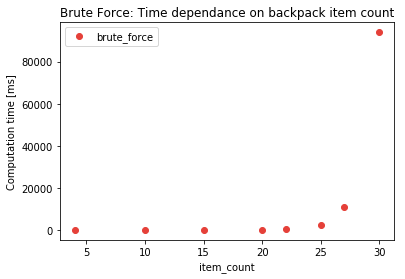

In [8]:
plot = comp_time[['brute_force']].plot( 
    title='Brute Force: Time dependance on backpack item count',
    marker = 'o', 
    ls = '', 
    c = (230/256, 64/256, 57/256))
plot.set_ylabel("Computation time [ms]")
plt.savefig('graphs/bruteforce_speed', bbox_inches='tight')

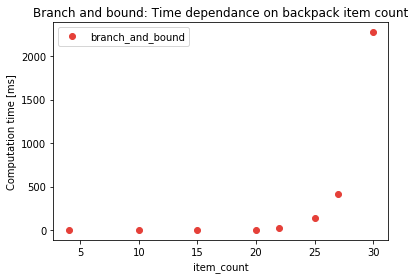

In [9]:
plot = comp_time[['branch_and_bound']].plot( 
    title='Branch and bound: Time dependance on backpack item count',
    marker = 'o', 
    ls = '', 
    c = (230/256, 64/256, 57/256))
plot.set_ylabel("Computation time [ms]")
plt.savefig('graphs/bnb_speed', bbox_inches='tight')

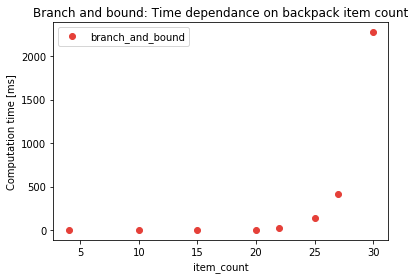

In [10]:
plot = comp_time[['branch_and_bound']].plot( 
    title='Branch and bound: Time dependance on backpack item count',
    marker = 'o', 
    ls = '', 
    c = (230/256, 64/256, 57/256))
plot.set_ylabel("Computation time [ms]")
plt.savefig('graphs/bnb_speed', bbox_inches='tight')

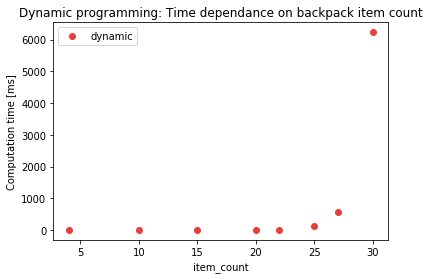

In [11]:
plot = comp_time[['dynamic']].plot( 
    title='Dynamic programming: Time dependance on backpack item count',
    marker = 'o', 
    ls = '', 
    c = (230/256, 64/256, 57/256))
plot.set_ylabel("Computation time [ms]")
plt.savefig('graphs/dynamic_speed', bbox_inches='tight')

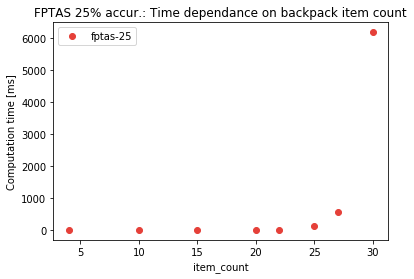

In [12]:
plot = comp_time[['fptas-25']].plot( 
    title='FPTAS 25% accur.: Time dependance on backpack item count',
    marker = 'o', 
    ls = '', 
    c = (230/256, 64/256, 57/256))
plot.set_ylabel("Computation time [ms]")
plt.savefig('graphs/fptas25_speed', bbox_inches='tight')

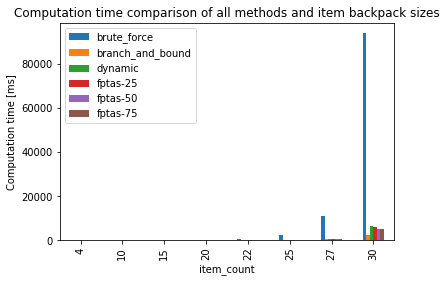

In [13]:
plot = comp_time.plot(
    title = 'Computation time comparison of all methods and item backpack sizes',
    kind = 'bar',
)
plot.set_ylabel("Computation time [ms]")
plt.savefig('graphs/all_speed_comparison', bbox_inches='tight')

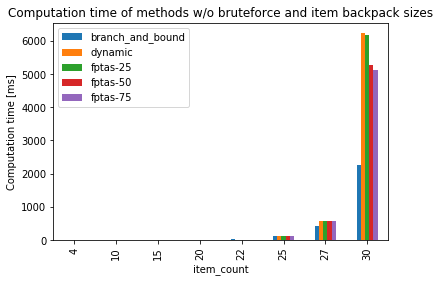

In [14]:
plot = comp_time.loc[:, comp_time.columns != 'brute_force'].plot(
    title = 'Computation time of methods w/o bruteforce and item backpack sizes',
    kind = 'bar',
)
plot.set_ylabel("Computation time [ms]")
plt.savefig('graphs/no_brute_speed_all', bbox_inches='tight')

In [15]:
data_werr = data
data_werr['error'] = data_werr['optimal_price'] - data_werr['price']
data_werr['relative_error_%'] = (data_werr['error'] / data_werr['optimal_price']) * 100

expected = { 'FPTAS25': 75, 'FPTAS50': 50, 'FPTAS75': 25 }
minimum = { 'FPTAS25': 1, 'FPTAS50': 1, 'FPTAS75': 1 }
maximum = { 'FPTAS25': 0, 'FPTAS50': 0, 'FPTAS75': 0 }
means = { 'FPTAS25': 0, 'FPTAS50': 0, 'FPTAS75': 0 }
samples = { 'FPTAS25': 0, 'FPTAS50': 0, 'FPTAS75': 0 }

for index, row in data_werr.iterrows():
    if row['method'].startswith('FPTAS'):
        means[row['method']] += row['relative_error_%']
        samples[row['method']] += 1
        
        if row['relative_error_%'] < minimum[row['method']]:
            minimum[row['method']] = row['relative_error_%']
        
        if row['relative_error_%'] > maximum[row['method']]:
            maximum[row['method']] = row['relative_error_%']
            
for index, row in means.items():
    means[index] = row / samples[index]

relative_errors = pd.DataFrame({
    'min_rel_err': minimum,
    'mean_rel_err': means,
    'expected_rel_err': expected,
    'max_rel_err': maximum
})


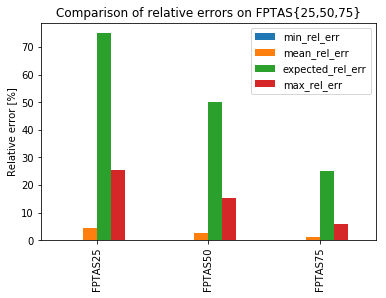

In [16]:
plot = relative_errors.plot(kind = 'bar',
                           title = 'Comparison of relative errors on FPTAS{25,50,75}',)
plot.set_ylabel("Relative error [%]")
plt.savefig('graphs/fptas_err_all', bbox_inches='tight')